In [52]:
1==1

True

# Importing libraries:

In [53]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing


# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.cluster import KMeans


#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


import warnings
warnings.filterwarnings("ignore")

# Loading dataset:

In [54]:
df_app = pd.read_csv("applicant.csv")
df_loan = pd.read_csv("loan.csv")

In [55]:
df_app

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0


In [56]:
df_loan

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,d68fbd2c-edad-11ea-b49e-2894666f2df6,1824545,45,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


## Joining the 2 pandas df:

In [57]:
df = pd.merge(df_app, df_loan, on = 'applicant_id', how = 'inner', sort = False)
df

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,...,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,...,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,...,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,...,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,...,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,7 years,...,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,1114064,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,4 years,...,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,...,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,1824545,23,male,single,1,for free,4,skilled employee / official,1 year,4 years,...,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1


# Data exploration:

## Basic description:

In [58]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*100)
    print('FEATURE DATA TYPES: ')
    print(data.info())
    print('\n', '-'*100)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*100)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    print('\n', '-'*100)
    print('DUPLICATE  VALUES')
    print(data.duplicated().sum())

In [59]:
show_info(df)

DATASET SHAPE:  (1000, 27) 

----------------------------------------------------------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                        

INFERENCE:
- Most of the features don't have NaN values. Howeever, some features like Telephone, Balance in existing bank account (lower and upper limits), and other EMI plans mostly contain NaN values. - Since, Telephone feature anyways is insignificant to our analysis, we drop it. 
- Also, since we have feature of Saving account balance we can drop Balance in existing bank account (lower and upper limits).
- No imputing strategy can successfully fill 80% of missing values in other EMI plans, so we have to drop it, unfortunately.
- Lastly, loan_id and application_id are also insignificant to our analysis, so we drop them too.

## Dropping some features:

In [60]:
df1 = df.drop(['applicant_id', 'loan_application_id', 'Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Balance_in_existing_bank_account_(upper_limit_of_bucket)', 'Other_EMI_plans'], axis='columns')
df1.head(15)

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,7 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,1,...,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1
5,35,male,single,2,for free,4,unskilled - resident,1 year,4 years,1,...,36,education,9055000,2,NaN,0,0,1,existing loans paid back duly till now,0
6,53,male,single,1,own,4,skilled employee / official,7 years,NaN,1,...,24,FF&E,2835000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
7,35,male,single,1,rent,2,management / self-employed / highly qualified ...,1 year,4 years,1,...,36,used vehicle,6948000,2,car or other,0,0,1,existing loans paid back duly till now,0
8,61,male,divorced/separated,1,own,4,unskilled - resident,4 years,7 years,1,...,12,electronic equipment,3059000,2,real estate,0,0,1,existing loans paid back duly till now,0
9,28,male,married/widowed,1,own,2,management / self-employed / highly qualified ...,NaN,0 year,1,...,30,new vehicle,5234000,4,car or other,0,0,2,critical/pending loans at other banks,1


## Univariate analysis:

### Numerical features:
- Primary_applicant_age_in_years
- Months_loan_taken_for
- Principal_loan_amount

<Axes: xlabel='Principal_loan_amount', ylabel='Density'>

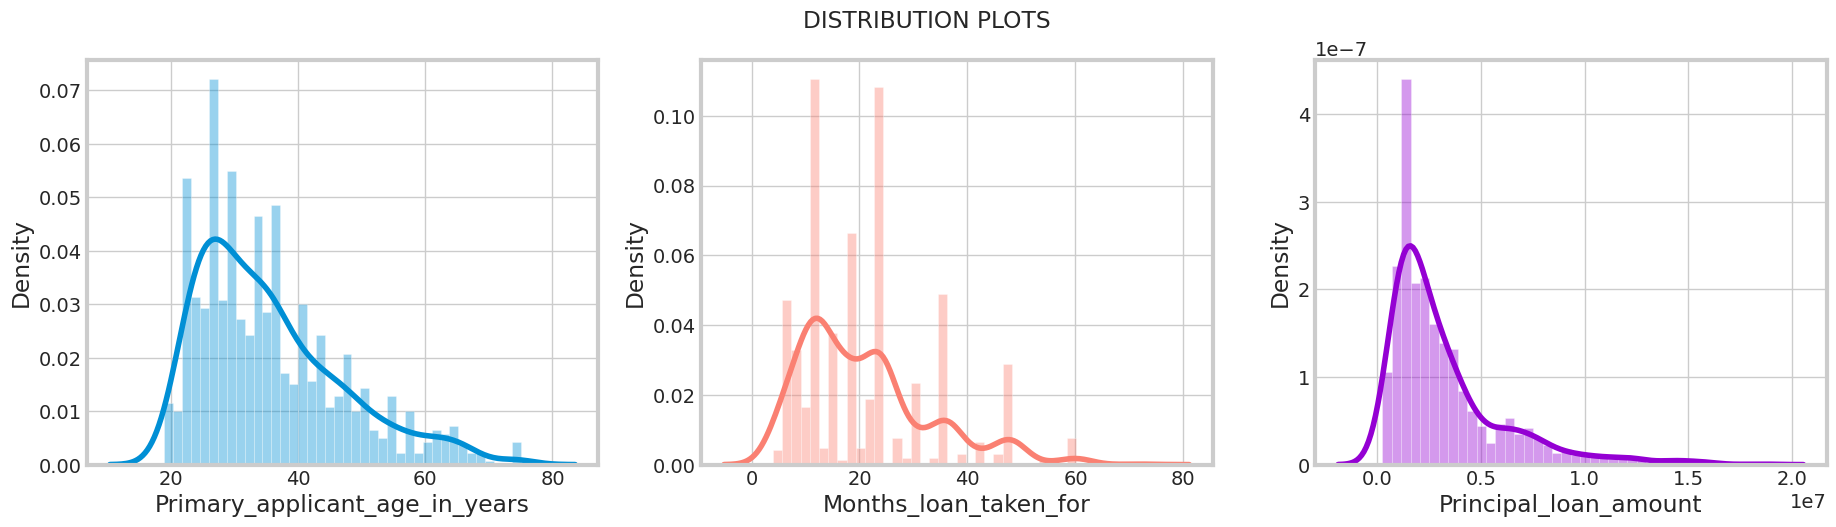

In [61]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Primary_applicant_age_in_years'], bins=40, ax=ax[0])
sns.distplot(df['Months_loan_taken_for'], bins=40, ax=ax[1], color='salmon')
sns.distplot(df['Principal_loan_amount'], bins=40, ax=ax[2], color='darkviolet')

<Axes: >

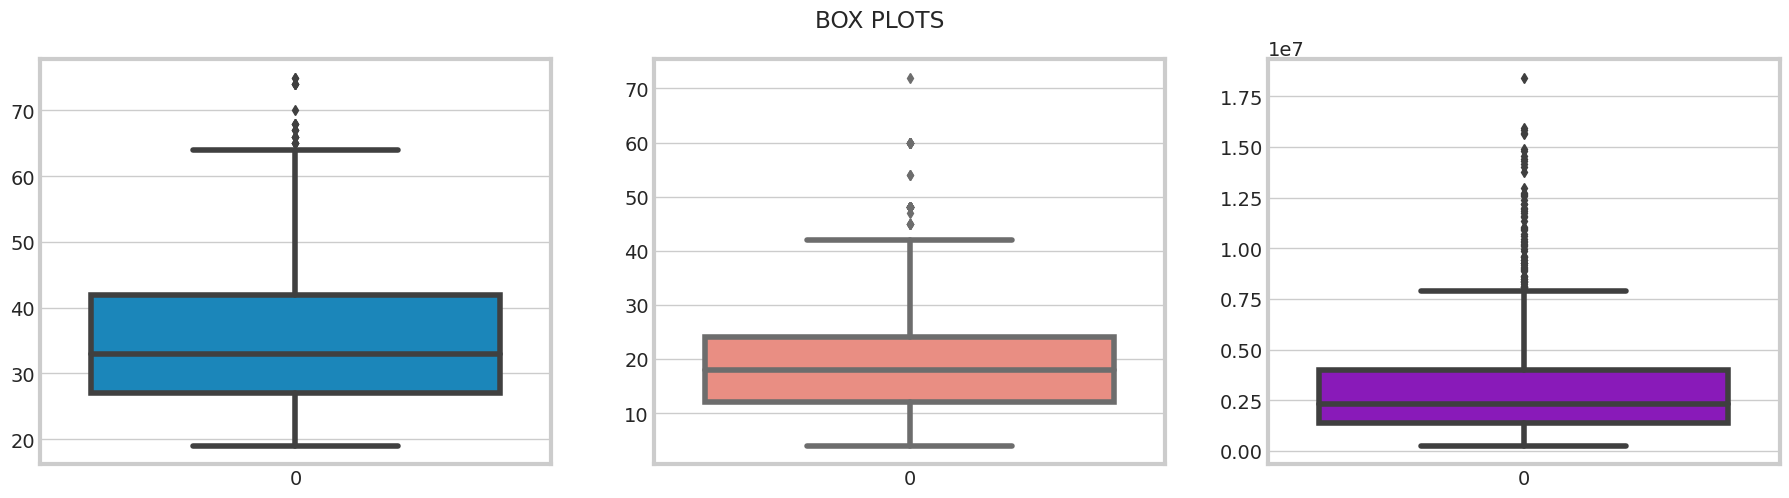

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['Primary_applicant_age_in_years'], ax=ax[0])
sns.boxplot(df['Months_loan_taken_for'], ax=ax[1], color='salmon')
sns.boxplot(df['Principal_loan_amount'], ax=ax[2], color='darkviolet')

INFERENCE:
- People from age group of 25-40 years have taken most of the loans.
- Most of the people have opted for a loan in range of 20 Lac Rs - 45 Lac Rs, with most popular choice of 25 Lac Rs. 
- Most people have opted to clear the loan within a period of 1-2 years, with most people opting for 1.5 years period.

In [63]:
# Basic statistics:
df[['Primary_applicant_age_in_years', 'Months_loan_taken_for', 'Principal_loan_amount']].describe()

,Primary_applicant_age_in_years,Months_loan_taken_for,Principal_loan_amount
count,1000.000000,1000.000000,1.000000e+03
mean,35.546000,20.903000,3.271258e+06
std,11.375469,12.058814,2.822737e+06
min,19.000000,4.000000,2.500000e+05
25%,27.000000,12.000000,1.365500e+06
50%,33.000000,18.000000,2.319500e+06
75%,42.000000,24.000000,3.972250e+06
max,75.000000,72.000000,1.842400e+07


### Categorical features (IMPORTANT ONES):
- Gender                                                      
- Marital_status                                                                                 
- Housing                                                                                  
- Employment_status                                          
                                          
- Savings_account_balance                                                                            
- Purpose                                                                          
- Property                                                   
- Has_coapplicant                                            
- Has_guarantor                                                                                         
- Number_of_existing_loans_at_this_bank                      
- Loan_history                                               
- high_risk_applicant                                        

In [64]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Gender", "Marital_status", "Employment_status"), 
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Gender'].value_counts().index,
                     values=df['Gender'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Marital_status'].value_counts().index,
                     values=df['Marital_status'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Employment_status'].value_counts().index,
                     values=df['Employment_status'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [65]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Housing", "Purpose", "Property"), 
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Housing'].value_counts().index,
                     values=df['Housing'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Purpose'].value_counts().index,
                     values=df['Purpose'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Property'].value_counts().index,
                     values=df['Property'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [66]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Savings_account_balance", "Loan_history", "high_risk_applicant"), 
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Savings_account_balance'].value_counts().index,
                     values=df['Savings_account_balance'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Loan_history'].value_counts().index,
                     values=df['Loan_history'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['high_risk_applicant'].value_counts().index,
                     values=df['high_risk_applicant'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [67]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Has_coapplicant", "Has_guarantor", "Number_of_existing_loans_at_this_bank"), 
                    specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
                   )

fig.add_trace(go.Pie(labels=df['Has_coapplicant'].value_counts().index,
                     values=df['Has_coapplicant'].value_counts()),
              row=1, col=1)
fig.add_trace(go.Pie(labels=df['Has_guarantor'].value_counts().index,
                     values=df['Has_guarantor'].value_counts()),
              row=1, col=2)
fig.add_trace(go.Pie(labels=df['Number_of_existing_loans_at_this_bank'].value_counts().index,
                     values=df['Number_of_existing_loans_at_this_bank'].value_counts()),
              row=1, col=3)

fig.update_layout(height=600, showlegend = False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

INFERENCE:
- Most of the loan applicants mostly consist of single males and remarried males. 
- More than 50% (63% to be precise) loan applicants are skilled professionals. However, a significant portion of unskilled people and people in high level positions have also opted for a loan.
- Many house owners have opted for a loan, mostly for the purpose of electronic equipment, new & used vehicle and Furniture, fixtures, and equipment (FF&E) and business.
- About 75% of loan applicants have low cash in their savings account, hence the need for loan.
- More than 50% of the applicants have been loyal and paid back their loans on time before. However, a significant portion (about 30%) of applicants haven't done so, henc pose a high risk fo being defaulters.
- Overall, 30% of the applicant are highly risky and 70% are good to go. Hencem implying an imbalance in the dataset.
- Interestingly, majority of applicants don't have a co_applicant and guarantor, which otherwise plays an important factor to convince the lendors that the applicant is of low risk.
- Lastly, majority of the applicants have low number of pending loans at this particular bank.

## Bivariate analysis:

### Correlation matrix:

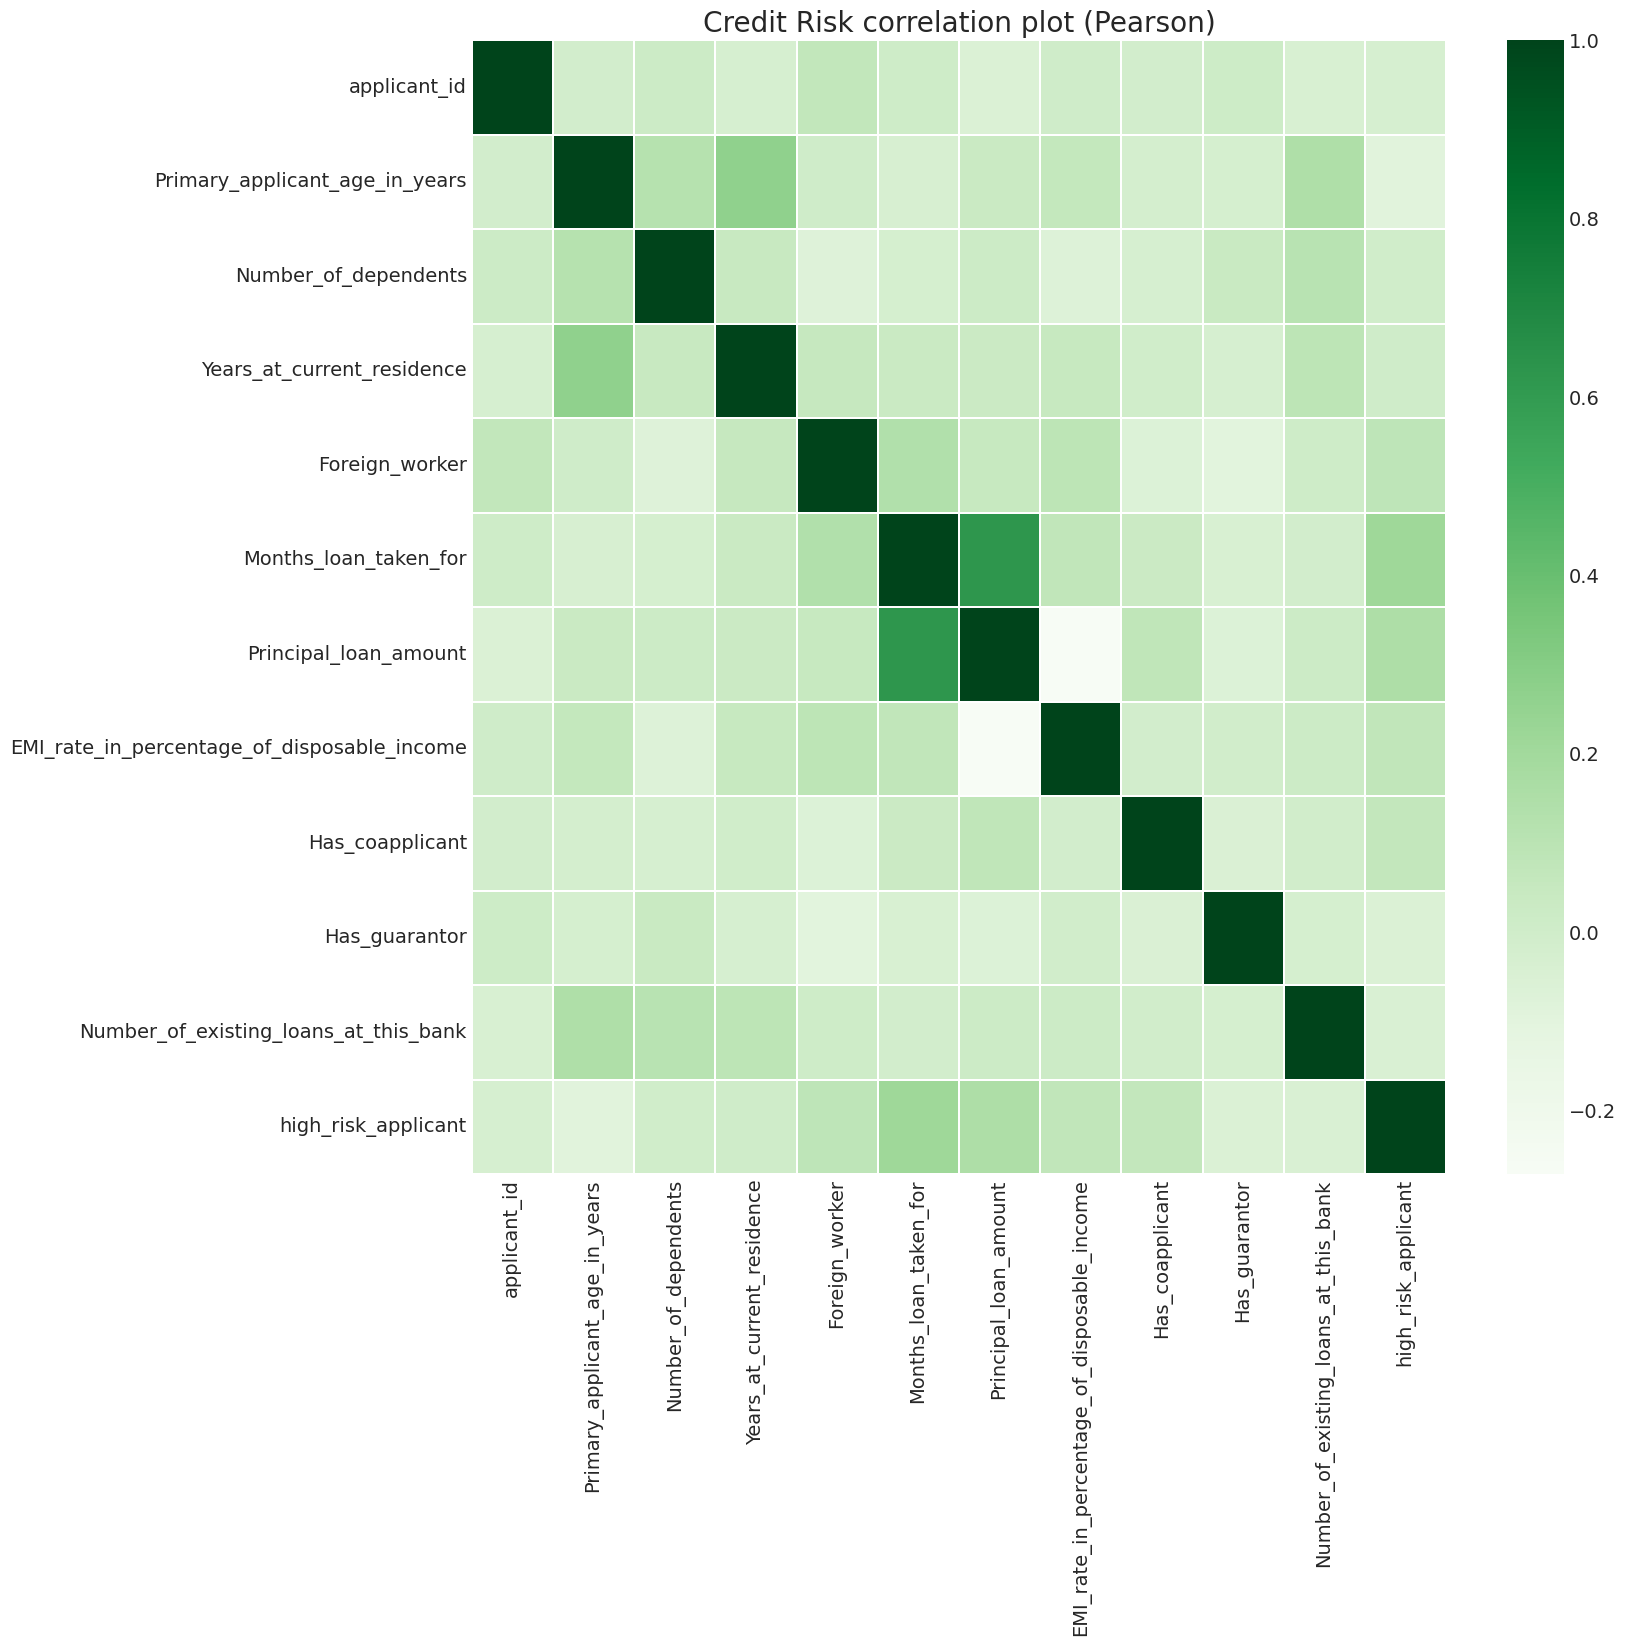

In [68]:
plt.figure(figsize = (14,14))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1, cmap="Greens")
plt.show()

INFERENCE:
- As expected, principal loan amount months for loan are positively correlated. Since, it would take quite an amount of time to pay back a huge amount of loan.
- We also see that number of years in current residence and age of applicant show positive correlation.

### Numerical features:

#### Gender

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

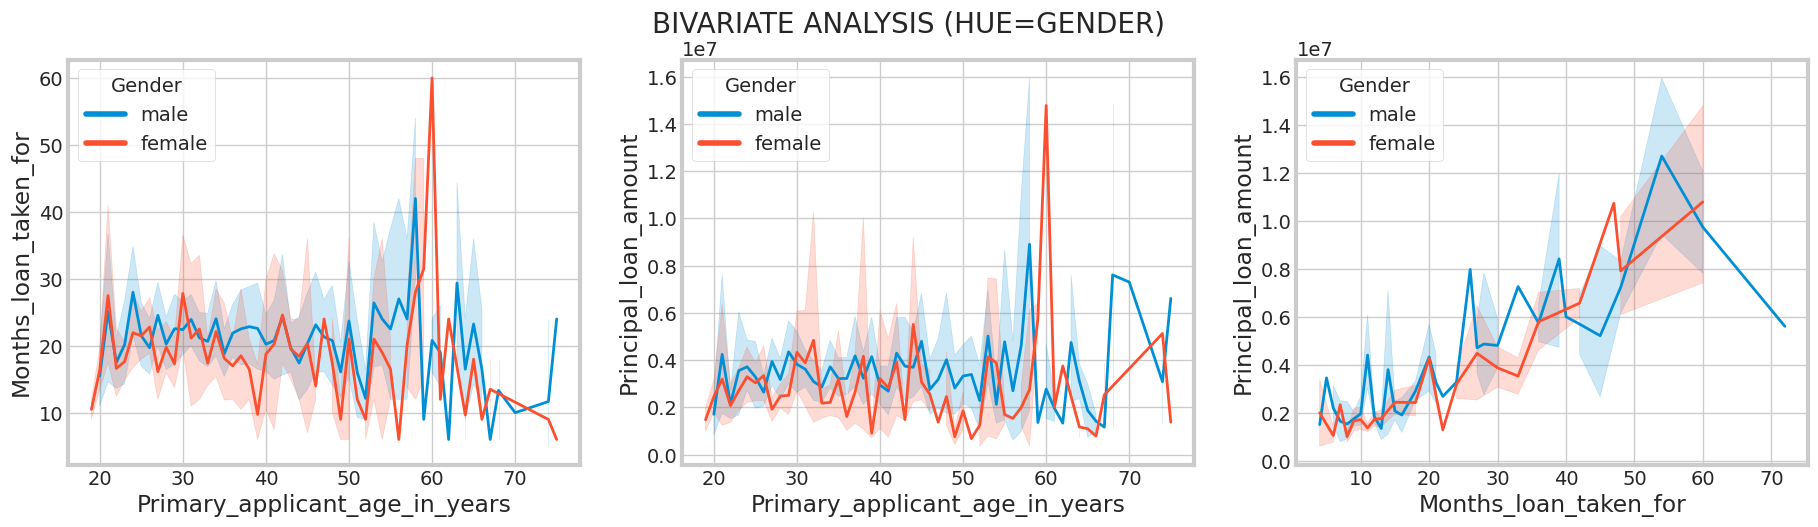

In [69]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=GENDER)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='Gender', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='Gender', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='Gender', lw=2, ax=ax[2])

INFERENCE:
- From above plots, its evident that people in young and little elder age (<55 years), take principal loan in the most frequent range as described above; for a period of 1-2 years.
- However, senior/retired citizens take a huge amount of loan for a long period time.

#### Savings_account_balance:

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

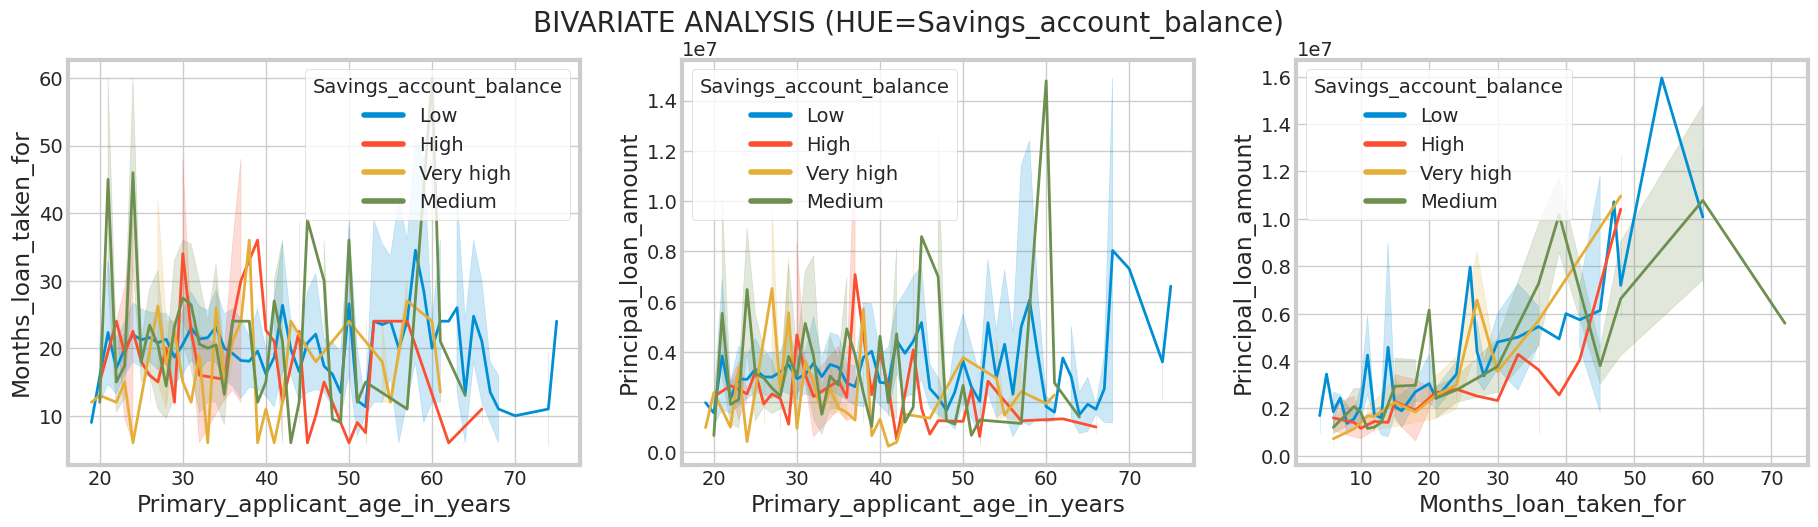

In [70]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=Savings_account_balance)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='Savings_account_balance', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='Savings_account_balance', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='Savings_account_balance', lw=2, ax=ax[2])

INFERENCE:
- Mostly senior citizens who have low to medium saving account balance opt for a retirement age loan, while the ones with high balance do very rarely.
- In contrast, in the younger population, the applicants who have a high savings account balalnce mostly opt for a loan.

# Risk Analysis:

## Univariate Numerical:

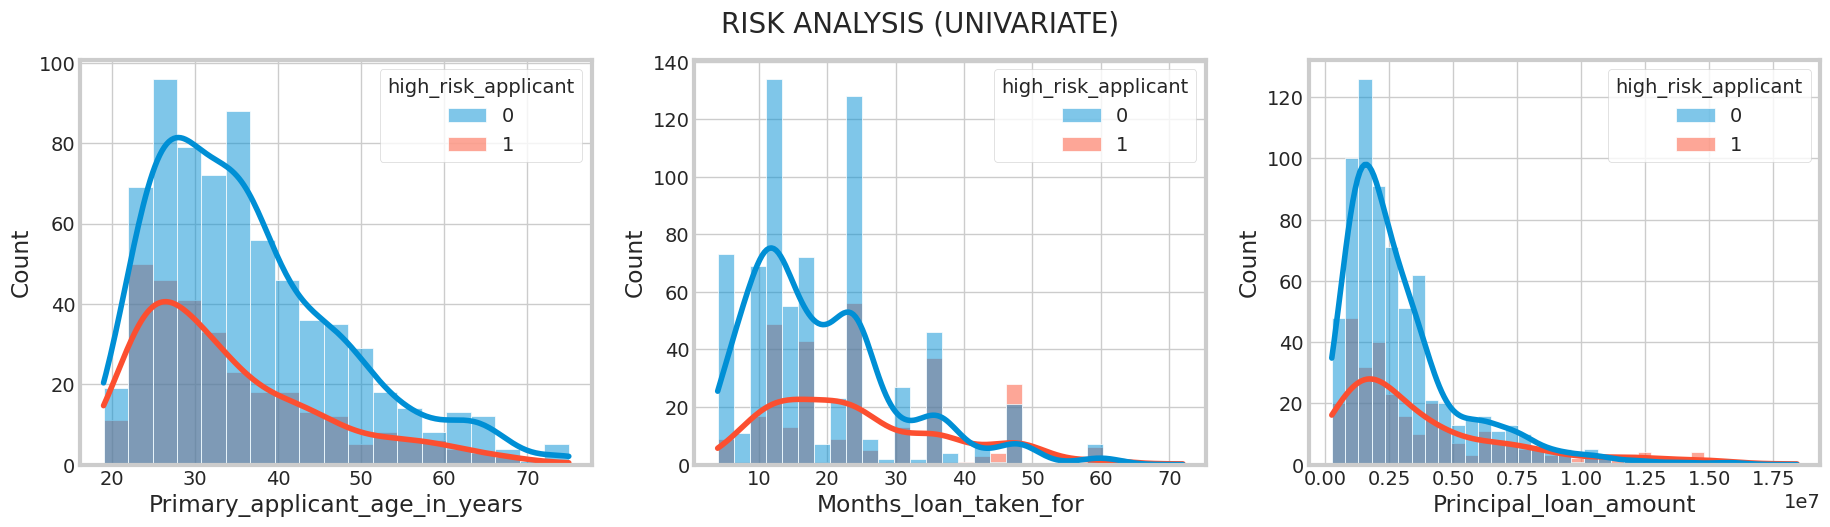

In [71]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('RISK ANALYSIS (UNIVARIATE)', fontsize=20)
# plt.tight_layout()

sns.histplot(data=df, x='Primary_applicant_age_in_years', ax=ax[0], hue = 'high_risk_applicant', kde=True)
sns.histplot(data=df, x='Months_loan_taken_for', ax=ax[1], hue = 'high_risk_applicant', kde=True)
sns.histplot(data=df, x='Principal_loan_amount', ax=ax[2], hue = 'high_risk_applicant', kde=True)
plt.show()

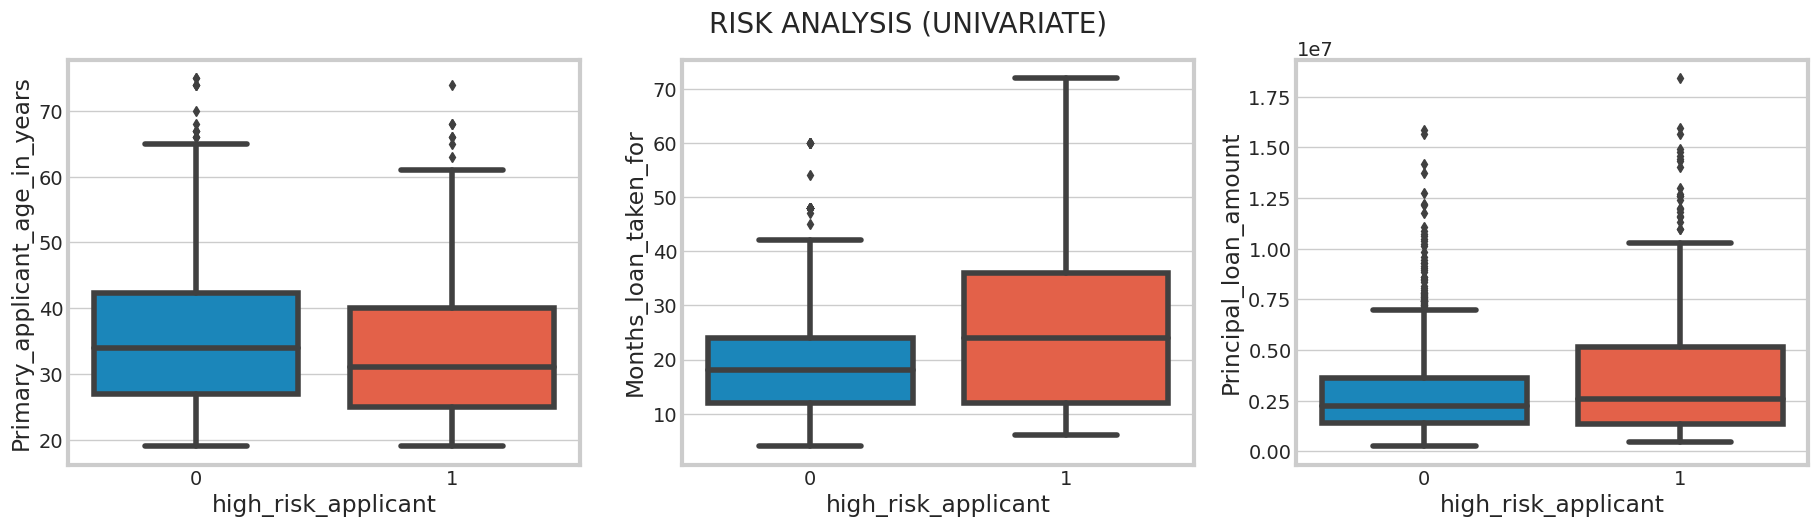

In [72]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('RISK ANALYSIS (UNIVARIATE)', fontsize=20)
# plt.tight_layout()

sns.boxplot(data=df, x = 'high_risk_applicant', y='Primary_applicant_age_in_years', ax=ax[0])
sns.boxplot(data=df, x = 'high_risk_applicant', y='Months_loan_taken_for', ax=ax[1])
sns.boxplot(data=df, x = 'high_risk_applicant', y='Principal_loan_amount', ax=ax[2])
plt.show()

INFERENCE:
- The high risk applicants lie mostly in the range of 25-40, i.e., the age group which consists of maximum number of applications.
- Again, most of the defaulters have taken principal loan amount same as the most popular choice, i.e, 20-45 Lac Rs. Here, although range extends to around 50 Lac Rs.
- This doesn't provide us with any new information. Because, since these ranges have highest number of applicants, hence the probability of an applicant being a high risk alos increases.

## Bivariate Categorical:

<Axes: xlabel='Months_loan_taken_for', ylabel='Principal_loan_amount'>

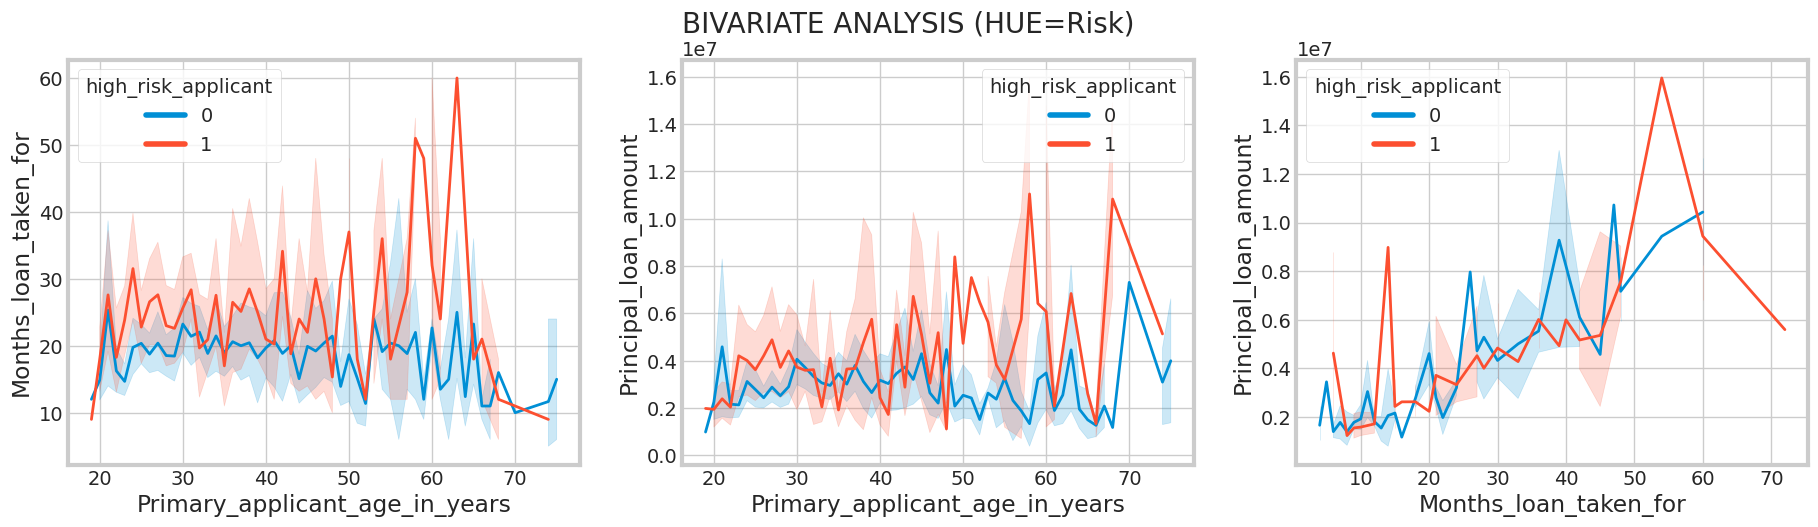

In [73]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.suptitle('BIVARIATE ANALYSIS (HUE=Risk)', fontsize=20)
# plt.tight_layout()

sns.lineplot(data=df, y='Months_loan_taken_for', x='Primary_applicant_age_in_years', hue='high_risk_applicant', lw=2, ax=ax[0])
sns.lineplot(data=df, y='Principal_loan_amount', x='Primary_applicant_age_in_years', hue='high_risk_applicant', lw=2, ax=ax[1])
sns.lineplot(data=df, y='Principal_loan_amount', x='Months_loan_taken_for', hue='high_risk_applicant', lw=2, ax=ax[2])

## Categorical features:

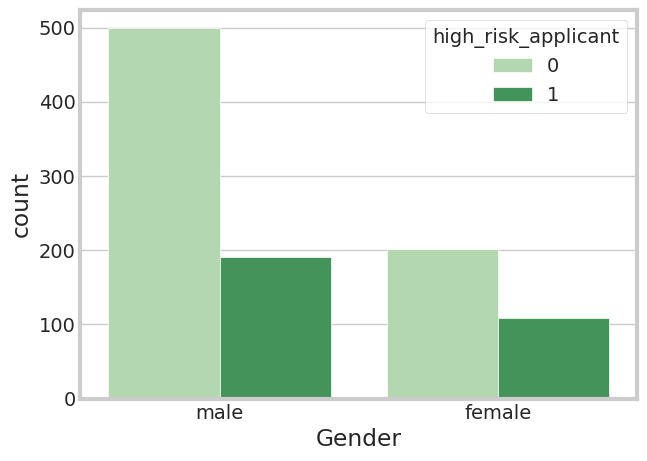

In [74]:
sns.countplot(x = df['Gender'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

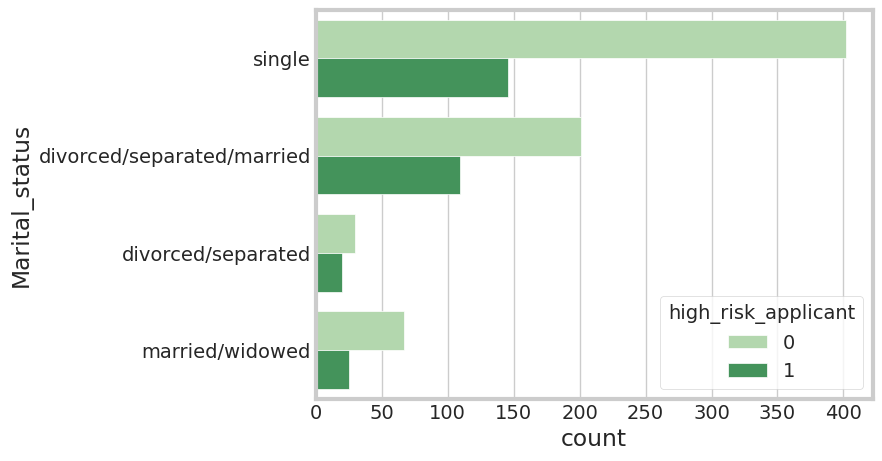

In [75]:
sns.countplot(y = df['Marital_status'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

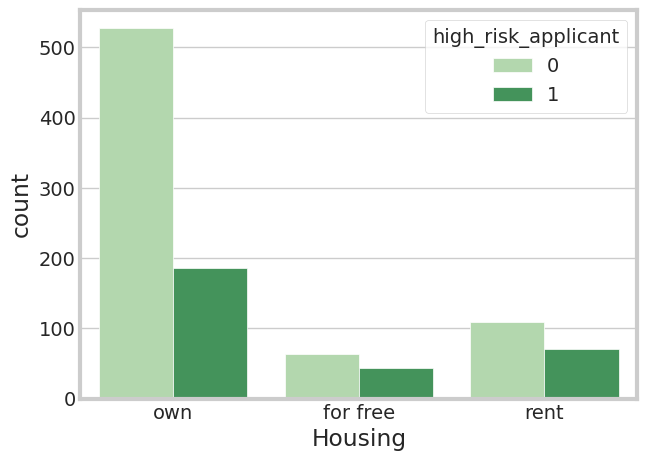

In [76]:
sns.countplot(x = df['Housing'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

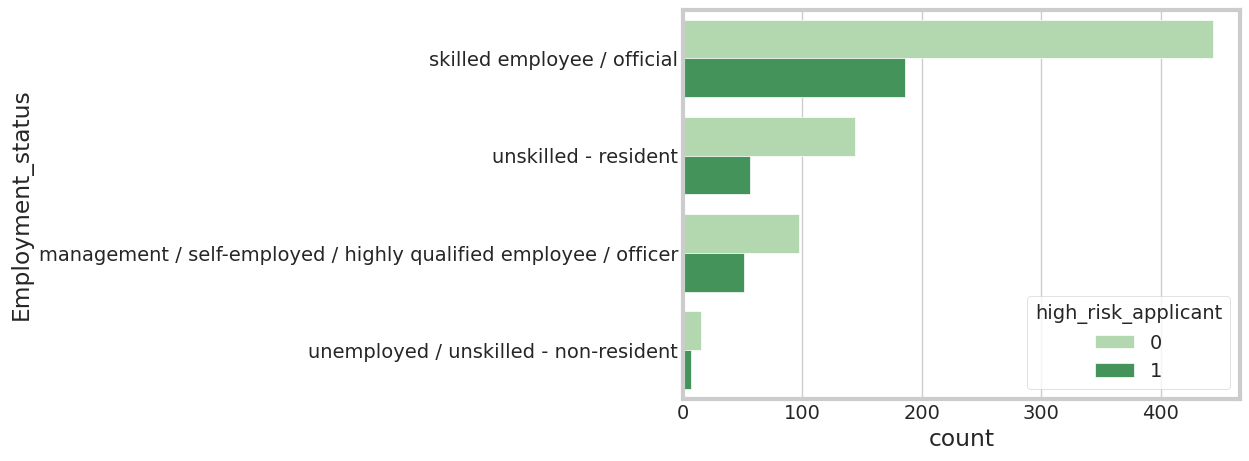

In [77]:
sns.countplot(y = df['Employment_status'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

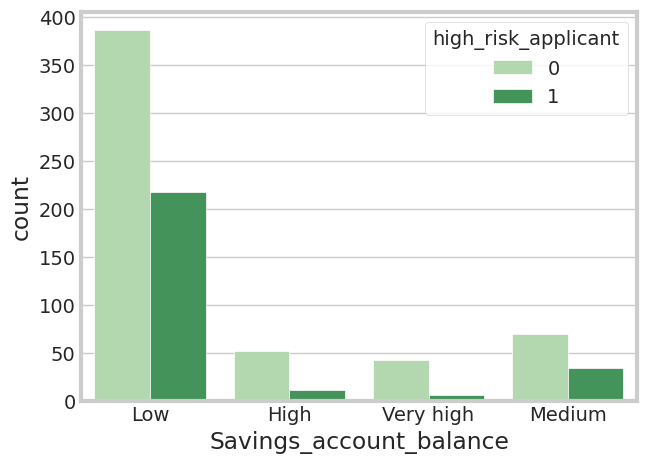

In [78]:
sns.countplot(x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

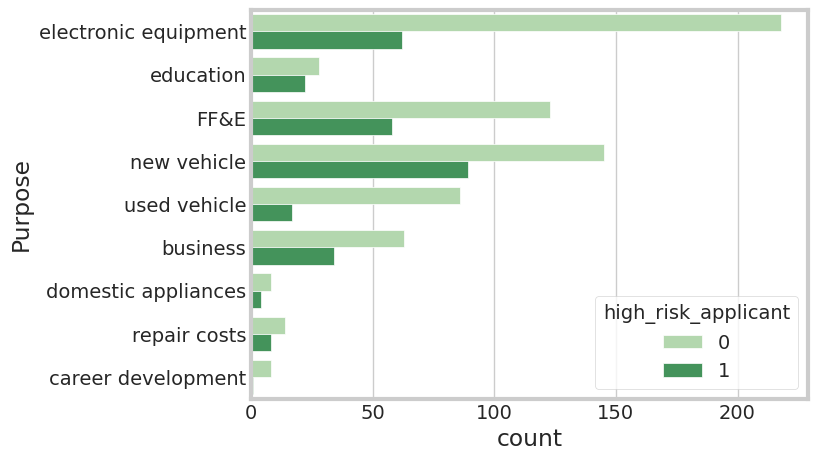

In [79]:
sns.countplot(y = df['Purpose'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

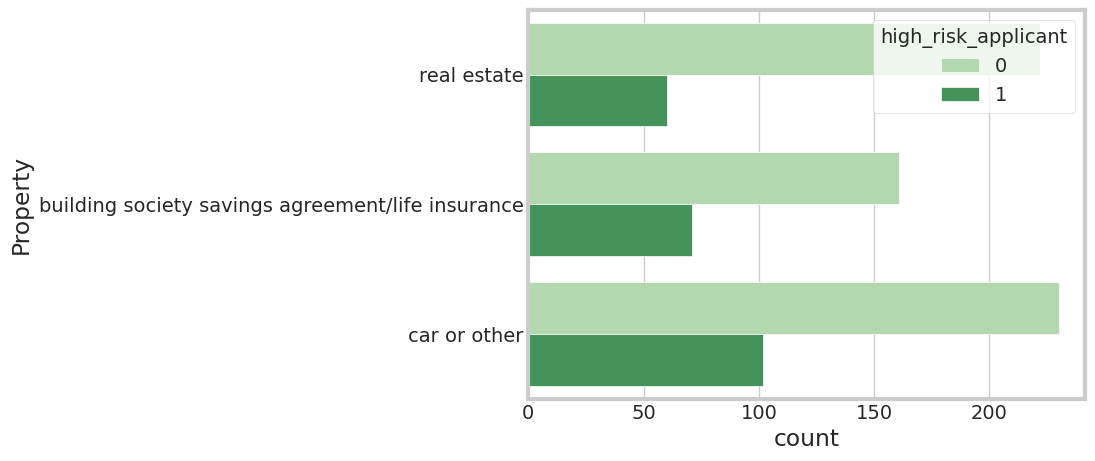

In [80]:
sns.countplot(y = df['Property'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

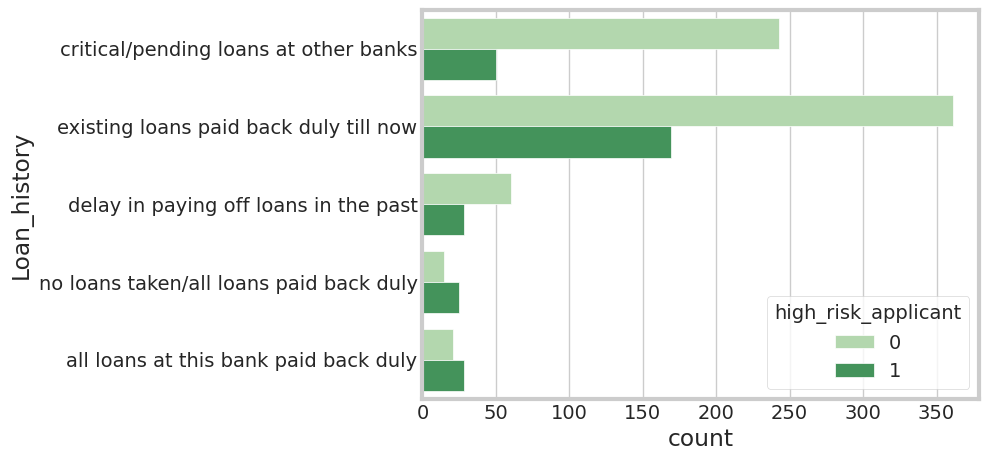

In [81]:
sns.countplot(y = df['Loan_history'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

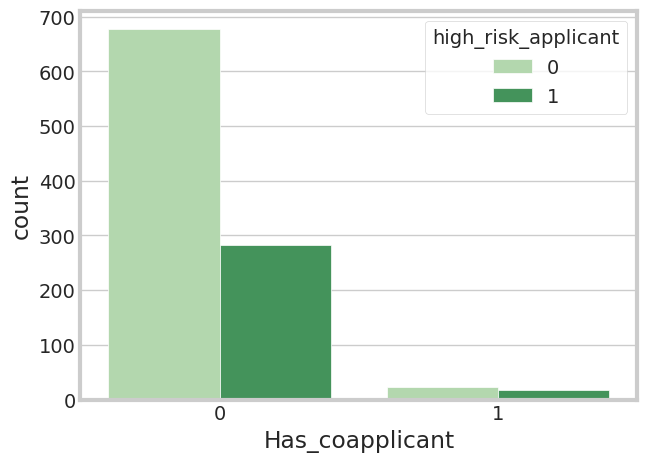

In [82]:
sns.countplot(x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

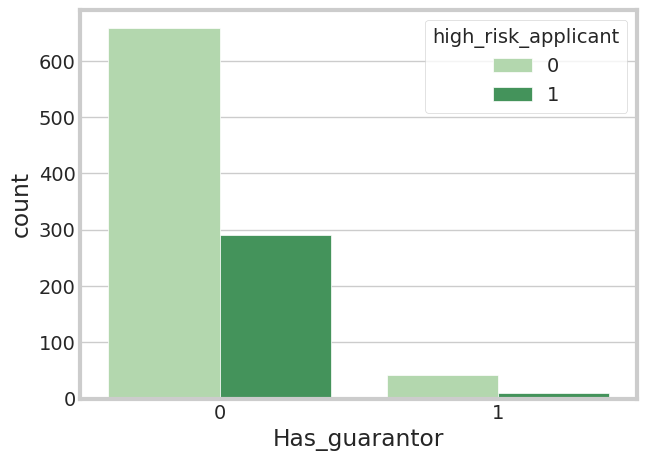

In [83]:
sns.countplot(x = df['Has_guarantor'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

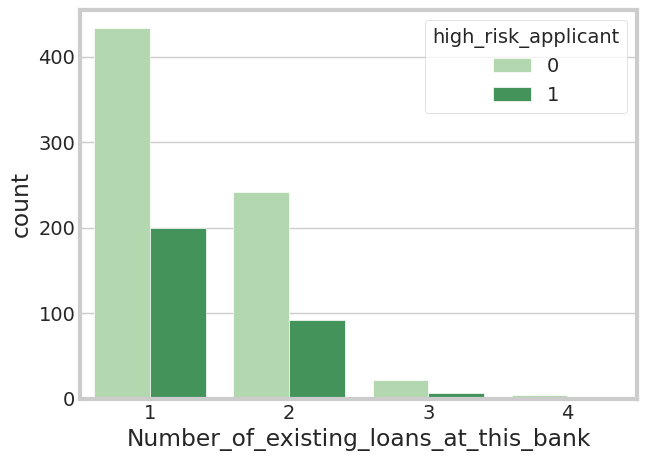

In [84]:
sns.countplot(x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette='Greens')
plt.show()

INFERENCE:
- Same as numerical features, the group with highest numbers has highest number of highly risky applicants, hence not providing any new significant discoveries.

## Numerical + Categorical:

### Age as numerical:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GENDER (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Gender'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Gender'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Marital_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Employment_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and Saving account balance (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Savings_account_balance'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Loan_history'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Housing'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Housing'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Purpose'], hue=df.high_risk_applicant, palette="Blues", split=True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Primary_applicant_age_in_years'], y = df['Property'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_coapplicant'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GUARANTOR (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_guarantor'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Has_guarantor'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and EXISTING LOANS (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Primary_applicant_age_in_years'], x = df['Number_of_existing_loans_at_this_bank'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

INFERENCE:
- Males have almost equal probabilities to be low and highly risk resp.But, in case of young female (age between 25-40 years), they are more likely to be highly risky.
- Single and Married fairly less likely to be risky, but divorced and divorced and remarried are more likely to be risky.
- Unskilled residents and unemployed and unskilled non-residents are highly risky, while people in employment and high positions are equally likely to be be both.
- Very high savings balance groups are very less likely to be highly risky, but others are equally likely.
- No loans taken/previous loan paid fully and delayed loans payment very less likely. 
- Surprisingly, the ones who appear very risky like the existing loans and loans at this particular bank are equally likely to be highly risky or less risky. However, this also maybe due to lack of more dataset points.
- On the other hand, those who are in critical state, i.e., multiple loans pending are more skewed towards being highly risky.
- The applicant who own their house and free loaders are slightly more likely than renters. However, this also maybe due to lack of more dataset points. 
- Education loans are highly risky, meanwhile loans for used vehicle, business, domestic applicances are less risky. For career deveplopment loans have zero risk associated with them. However, this also maybe due to lack of more dataset points. For other categories, they are equally likely.
- People who own Real estate properties and have done Agreements/Savings are slightly risky, but  
- Having no coapplicant is risky. However, coapplicant's presence doesn't gurantee less risk. On the other hand, whether guarantor is present or not, in both cases, there is an associated risk.
- Number of loans at this bank doesn't reveal any feature.

### Principal_loan_amount:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('Principal_loan_amount and GENDER (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Gender'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Gender'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Marital_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Employment_status'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('Principal_loan_amount and Saving account balance (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Savings_account_balance'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Savings_account_balance'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Loan_history'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and HOUSING (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Housing'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Housing'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
sns.violinplot(x = df['Principal_loan_amount'], y = df['Purpose'], hue=df.high_risk_applicant, palette="Blues", split=True)
plt.legend(loc='upper right')
plt.show()

In [ ]:

sns.violinplot(x = df['Principal_loan_amount'], y = df['Property'], hue=df.high_risk_applicant, palette="Blues")
plt.legend(loc='upper right')
plt.show()


In [ ]:

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and COAPPLICANT (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_coapplicant'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_coapplicant'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and GUARANTOR (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_guarantor'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Has_guarantor'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

In [ ]:

fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.suptitle('AGE and EXISTING LOANS (HUE=Risk)', fontsize=20)

sns.violinplot(y = df['Principal_loan_amount'], x = df['Number_of_existing_loans_at_this_bank'], hue=df.high_risk_applicant, palette="Blues", ax=ax[0])
sns.violinplot(y = df['Principal_loan_amount'], x = df['Number_of_existing_loans_at_this_bank'], palette="Blues", ax=ax[1])
plt.legend(loc='upper right')
plt.show()

INFERENCE:
- Both male and females taking loan equivalent to most popular choice are less likely to be highly risky.
- Here divorced/remarried are less likely to pose a risk, but seperated ones still appear to be risky.
- Interestingly, all groups in employment status appear to be less risky, especially unskilled applicants. However, our previous analysis in the age group of 20-45 years proved that they were risky. 
- Same contrasting features can be seen in case of loan_history feature
- For purpose feature, apparently higher principal loan for used vehicle is risky as compared to before.
- No new information for Savings_account_balance, Housing, Property, Coapplicant, Guarantor and number of loans features.

## Bivariate for all categorical:

In [ ]:
# This is to encode the data into numbers that can be used in our scatterplot
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cat = ['Gender', 'Marital_status', 'Employment_status', 'Savings_account_balance', 'Loan_history', 
             'Housing', 'Purpose', 'Property', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank']

df_cat = df[cat]
enc_df = pd.DataFrame(ord_enc.fit_transform(df_cat), columns=cat)

# Generate the random noise
xnoise, ynoise = np.random.random(len(df_cat))/3, np.random.random(len(df_cat))/3

In [ ]:
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Marital_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[1]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Employment_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[2]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND Savings_account_balance (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Gender"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1], ord_enc.categories_[0])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Employment_status"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3], ord_enc.categories_[2]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Marital_status"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[1])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Savings_account_balance"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[3]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
# GENDER AND MARITAL_STAUS (HUE=RISK)
plt.scatter(enc_df["Employment_status"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3], ord_enc.categories_[2])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Savings_account_balance"]+xnoise, enc_df["Loan_history"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[3])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4], ord_enc.categories_[4]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Savings_account_balance"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[3])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6]) 

plt.grid()
sns.despine(left=True, bottom=True)

In [ ]:
plt.scatter(enc_df["Loan_history"]+xnoise, enc_df["Purpose"]+ynoise, alpha=1, c=df['high_risk_applicant'])
# Set xticks and yticks to be your category names:
plt.xticks([0, 1, 2, 3, 4], ord_enc.categories_[4])
# For a particular category, they lie close to their resp. integer values, while other  categories are far off
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ord_enc.categories_[6]) 

plt.grid()
sns.despine(left=True, bottom=True)

# Overall summary:

RISKY GROUPS ARE (According to given dataset):
- Females have a higher chance than males.
- Divorced/Remarried females and Divorced males.
- Unskilled residents and non-residents.
- Savings_account_balance doesn't point any specific group, i.e., each group is equally likely.
- Due to lack of datapoints, it appears that each case of loan_history is equally likely, with multiple loan pending group being slightly more riskier than others.
- People living on free basis are slighly more likely.
- Education loans are very risky.
- Applicants owning real estate and in some agreement/savings are slightly risky.
- Having no coapplicant is risky. However, coapplicant's presence doesn't gurantee less risk. On the other hand, whether guarantor is present or not, in both cases, there is an associated risk.


# Dealing with missing values:

## Specific cases:

In [ ]:
df1.isna().sum()

In [ ]:
df[df['Has_been_employed_for_at_least'].isna()].head(25)

In [ ]:
df1[df1['Has_been_employed_for_at_most'].isna()].head(25)

In [ ]:
df[df['Savings_account_balance'].isna()].head(25)

In [ ]:
df[df['Purpose'].isna()]

In [ ]:
df[df['Property'].isna()].head(30)

## Fixing:

In [ ]:
df1['Has_been_employed_for_at_least'] = df1['Has_been_employed_for_at_least'].fillna('0 year')

In [ ]:
# least_working_age = 23
# max_employ = {'Has_been_employed_for_at_most':[]}

# for idx, row in df.iterrows():

#   if type(row['Has_been_employed_for_at_most'])=='str':
#      max_employ['Has_been_employed_for_at_most'].append(row['Has_been_employed_for_at_most'])
    
#   else:
#     max_employ['Has_been_employed_for_at_most'].append(row['Primary_applicant_age_in_years'] - least_working_age)
   
# df1['Has_been_employed_for_at_most'] = max_employ

In [ ]:
df2 = df1.drop('Has_been_employed_for_at_most', axis = 'columns')

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df3 = pd.DataFrame(imp.fit_transform(df2), columns=df2.columns, index=df2.index)

In [ ]:
df3.isna().sum()

# Feature Engineering:

In [ ]:
df3['Age_Group'] = ' '

df4 = df3.copy()
lst = [df4]

for col in lst:
    col.loc[(col['Primary_applicant_age_in_years'] > 18) & (col['Primary_applicant_age_in_years'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Primary_applicant_age_in_years'] > 29) & (col['Primary_applicant_age_in_years'] <= 40), 'Age_Group'] = 'Seniors professionals'
    col.loc[(col['Primary_applicant_age_in_years'] > 40) & (col['Primary_applicant_age_in_years'] <= 55), 'Age_Group'] = 'Old professionals'
    col.loc[col['Primary_applicant_age_in_years'] > 55, 'Age_Group'] = 'Elder citizens' 

In [ ]:
df3 = df3.drop('Age_Group', axis = 'columns')
df4

In [ ]:
sns.countplot(y = df4['Age_Group'], hue=df4.high_risk_applicant, palette='Greens')
plt.show()